In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
def cost(x):
    m = X.shape[0]
    return 0.5/m * np.linalg.norm(X.dot(x) - y, 2)**2

In [3]:
def grad(x):
    m = X.shape[0]
    return 1/m * X.T.dot(X.dot(x) - y)

In [4]:
def gradient_decsent(x_init, learning_rate, iteration):
    x_list = [x_init]
    for i in range(iteration):
        x_new = x_list[-1] - learning_rate*grad(x_list[-1])
#         if np.linalg.norm(grad(x_new))/(len(x_new)) < 1: # Cách 1: để dừng thuật toán (khi grad đủ nhỏ => thuật toán chạm điểm cực trị)
#             break
        
        x_list.append(x_new)
    return x_list

101


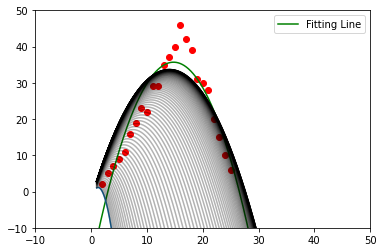

In [22]:
X = np.array([[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]]).T
y = np.array([[2,5,7,9,11,16,19,23,22,29,29,35,37,40,46,42,39,31,30,28,20,15,10,6]]).T

fig1 = plt.figure("GD for Linear Regression")
ax = plt.axes(xlim=(-10,50), ylim=(-10,50)) 
plt.plot(X, y, "ro")

x_square = np.array(X[:]**2)
ones = np.ones((X.shape[0], 1), dtype=np.int8)
X = np.concatenate((x_square, X, ones), axis=1)

model = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)

x0_model = np.linspace(1, 46, 10000)
y0_model = model[0][0]*(x0_model**2) + model[1][0]*x0_model + model[2][0]

plt.plot(x0_model, y0_model, label="Fitting Line", color="green")
plt.legend();

# Random initial line
x_init = np.array([[-2.], [5.], [-2.]])
y_init = x_init[0][0]*(x0_model**2) + x_init[1][0]*x0_model + x_init[2][0]
plt.plot(x0_model, y_init)


# check_grad(x_init)

# Run gradient descent
iteration = 100
learning_rate = 0.000001

x_list = gradient_decsent(x_init, learning_rate, iteration)
for i in range(len(x_list)):
    y0_gd = x_list[i][0][0]*(x0_model**2) + x_list[i][1][0]*x0_model +x_list[i][2][0]
    plt.plot(x0_model, y0_gd, color="black", alpha = 0.3);
    
print(len(x_list))

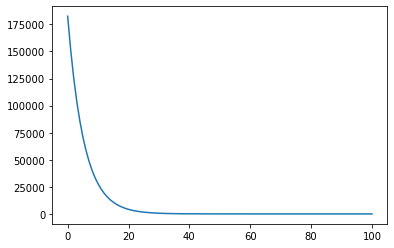

In [14]:
# biểu đồ để xác định khi nào dừng thuật toán (tìm iteration phù hợp)
cost_list = []
iter_list = []

for i in range(len(x_list)):
    iter_list.append(i)
    cost_list.append(cost(x_list[i]))
    
plt.plot(iter_list, cost_list);